In [ ]:
#Beginning exploration and shaping of data for V4 fitting project

In [ ]:
#all data from http://crcns.org/files/data/vim-1/crcns-vim-1-readme.pdf (thank you Kendrick Kay)
#REFERENCES:
#Kay, K. N., Naselaris, T., Prenger, R. J., & Gallant, J. L. (2008). Identifying natural images
#from human brain activity. Nature, 452(7185), 352-355.
#Naselaris, T., Prenger, R. J., Kay, K. N., Oliver, M., & Gallant, J. L. (2009). Bayesian
#reconstruction of natural images from human brain activity. Neuron, 63(6), 902-915.

In [1]:
#basic imports
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pymongo as pm
import numpy as np
import h5py
import scipy as sp
import scipy.stats as stats
import tables
import os

In [2]:
file_path="/share/kalanit/biac2/kgs/projects/Dawn/CS431/data/"

#read in the mat files
fmri_dataset=h5py.File(os.path.join(file_path,"estimated_responses.mat"),'r')

In [3]:
list(fmri_dataset.items())

[(u'dataTrnS1', <HDF5 dataset "dataTrnS1": shape (1750, 25915), type "<f8">),
 (u'dataTrnS2', <HDF5 dataset "dataTrnS2": shape (1750, 26329), type "<f8">),
 (u'dataValS1', <HDF5 dataset "dataValS1": shape (120, 25915), type "<f8">),
 (u'dataValS2', <HDF5 dataset "dataValS2": shape (120, 26329), type "<f8">),
 (u'roiS1', <HDF5 dataset "roiS1": shape (1, 25915), type "<f8">),
 (u'roiS2', <HDF5 dataset "roiS2": shape (1, 26329), type "<f8">),
 (u'voxIdxS1', <HDF5 dataset "voxIdxS1": shape (1, 25915), type "<f8">),
 (u'voxIdxS2', <HDF5 dataset "voxIdxS2": shape (1, 26329), type "<f8">)]

In [6]:
# Dataset info:
# dataTrnS1 = 1750 x 25915; 1750 responses (1 per training image) for ~25000 voxels
#dataTrnS1 is training data for Subject 1, the rest of the data keys are the same 
#for the test data plus train and test for Subject 2
# roi<S1/S2> = indices for voxels corresponding to ROIs
# voxIdx<S1/S2> = indices for mapping voxels into 64x64x18 volume - NOT NEEDED

fmri_dataset.keys()

[u'dataTrnS1',
 u'dataTrnS2',
 u'dataValS1',
 u'dataValS2',
 u'roiS1',
 u'roiS2',
 u'voxIdxS1',
 u'voxIdxS2']

In [116]:
#get the data out
train_S1 = fmri_dataset['dataTrnS1']
test_S1 = fmri_dataset['dataValS1']
train_S2 = fmri_dataset['dataTrnS2']
test_S2 = fmri_dataset['dataValS2']

In [117]:
# for roi<S1/S2> there are 7 ROIs (+ index 0 which equals "other")
# the one we care about is index 6 for V4

print(np.unique(fmri_dataset['roiS1'])) #sanity check
unique_ROIs = np.unique((fmri_dataset['roiS1'])) 

[0. 1. 2. 3. 4. 5. 6. 7.]


In [118]:
roi_S1 = fmri_dataset['roiS1']
roi_S2 = fmri_dataset['roiS2']

print(roi_S1.shape)
print(train_S1.shape)


(1, 25915)
(1750, 25915)


In [119]:
#organize subject 1
S1_train_data_by_ROI = {c: train_S1[:,roi_S1[0,:] == c] 
                       for c in unique_ROIs}
S1_test_data_by_ROI = {c: test_S1[:,roi_S1[0,:] == c] 
                       for c in unique_ROIs}
#organize subject 2
S1_train_data_by_ROI = {c: train_S2[:,roi_S2[0,:] == c] 
                       for c in unique_ROIs}
S1_test_data_by_ROI = {c: test_S2[:,roi_S2[0,:] == c] 
                       for c in unique_ROIs}

In [121]:
S1_train_data_by_ROI.keys()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [122]:
S1_train_data_by_ROI

{0.0: array([[        nan,         nan,         nan, ..., -0.75287412,
          1.42836727,  1.04388544],
        [        nan,         nan,         nan, ..., -0.08653505,
          1.38330723,  0.37550432],
        [        nan,         nan,         nan, ...,  1.01755498,
         -0.33827361,  0.64753462],
        ...,
        [-0.02941922, -0.31418271,  1.17927117, ..., -0.38448378,
         -0.5397169 ,  0.78245849],
        [ 0.99493732,  0.76161928,  0.99585627, ..., -1.51139071,
          1.39556167,  0.74428596],
        [ 1.00058702, -2.48457912, -1.77321108, ...,  1.57612049,
          1.36631417, -0.77861461]]),
 1.0: array([[-0.15647625,  0.75309501,  0.05470635, ...,         nan,
                 nan,         nan],
        [ 1.59859432, -0.47726859, -0.61301802, ...,         nan,
                 nan,         nan],
        [ 0.65197669, -0.10565409, -0.48985988, ...,         nan,
                 nan,         nan],
        ...,
        [ 2.61617692,  0.4125248 ,  0.388308

In [123]:
#sanity checks
print(S1_train_data_by_ROI[0.0].shape)
print(S1_train_data_by_ROI[6.0].shape)
print(S1_test_data_by_ROI[0.0].shape)
print(S1_test_data_by_ROI[6.0].shape)

(1750, 18626)
(1750, 1022)
(120, 18626)
(120, 1022)


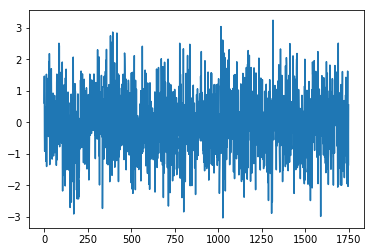

In [126]:
plt.plot(S1_train_data_by_ROI[6.0][:,0]) #example V4 voxel responses to training images

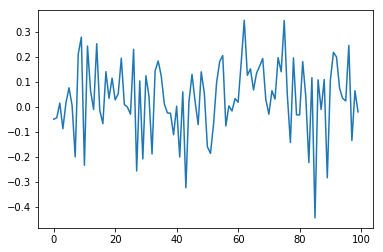

In [162]:
plt.plot(np.nanmean(S1_train_data_by_ROI[6.0], axis=1)[0:100]) #avg of all V4 voxels for 1st 100 images

<function matplotlib.pyplot.show>

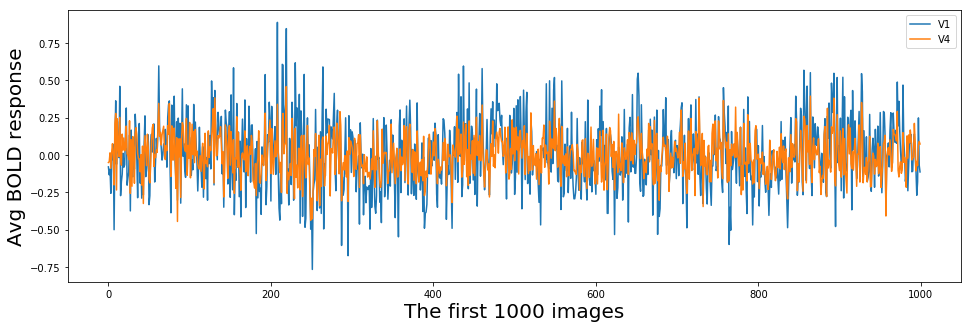

In [183]:
N_images = 1000
plt.figure(figsize=(16,5))
V1, = plt.plot(np.nanmean(S1_train_data_by_ROI[1.0], axis=1)[0:N_images],
             label='V1') #avg of all V1 voxels for 1st N images
V4, = plt.plot(np.nanmean(S1_train_data_by_ROI[6.0], axis=1)[0:N_images],
              label='V4') #avg of all V4 voxels for 1st N images
plt.xlabel('The first %d images' % N_images, fontsize=20)
plt.ylabel('Avg BOLD response', fontsize=20)
plt.legend(handles=[V1, V4])
plt.show

In [ ]:
fmri_dataset.close()